## Yahoo Finance API
https://theautomatic.net/yahoo_fin-documentation/#methods 

Taking in News data

Common News Outlets:
Reuters,
Bloomberg,
Techcrunch,
Invesopedia,
TheStreet,
Buisness Insider,
StockStory,
MT Newswires,
Associated Press Finance,
Motley Fool,
Stock Market Alerts,
SmartAsset,
Fortune,
Morningstar Research,
Investor's Buisness Daily,
Barrons.com,
Benzinga




In [55]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.6-cp311-cp311-macosx_11_0_arm64.whl size=246712 sha256=cd14d8c3e4c3d37905f2e3ac0ac8c0c3341c79e0a513118a2875832a6447c594
  Stored in directory: /Users/benbaize/Library/Caches/pip/wheels/1c/09/7e/9f659fde248ecdc1722a142c1d744271aad3914a0afc191058
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [57]:
import yfinance as yf

# Define the stock symbol (replace 'AAPL' with any stock symbol)
stock_symbol = 'AAPL'

# Fetch the stock data
stock = yf.Ticker(stock_symbol)

# Get the current day's data (it includes the volume and price data)
stock_data = stock.history(period='1d')

# Fetch the current volume
current_volume = stock_data['Volume'][0]

# Fetch the current price
current_price = stock_data['Close'][0]

# Fetch the average volume and float from the stock's info
stock_info = stock.info
average_volume = stock_info.get('averageVolume')
float_shares = stock_info.get('floatShares')

# Output the current price, current volume, average volume, and float
print(f"Current Price for {stock_symbol}: {current_price}")
print(f"Current Volume for {stock_symbol}: {current_volume}")
print(f"Average Volume for {stock_symbol}: {average_volume}")
print(f"Float (Shares available for trading) for {stock_symbol}: {float_shares}")


Current Price for AAPL: 220.69000244140625
Current Volume for AAPL: 38716303
Average Volume for AAPL: 55900977
Float (Shares available for trading) for AAPL: 15179810381


/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_57017/2669977559.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_volume = stock_data['Volume'][0]
/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_57017/2669977559.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = stock_data['Close'][0]


In [27]:
import yahoo_fin.stock_info as si
from yahoo_fin import news 
news = news.get_yf_rss("SGLY")
print(news[0])

title_padding = 55 
published_padding = 25
link_padding = 90 

print(f"{'Summary'.ljust(title_padding)}   {'Published'.ljust(published_padding)}   {'Link'.ljust(link_padding)}")
print("=" * (title_padding + published_padding + link_padding))

for article in news:
    cropped_title = article['title'][:title_padding - 3] + "..." if len(article['title']) > title_padding else article['title']
    published = article['published'][:published_padding]  
    
    print(f"{cropped_title.ljust(title_padding)}   {published.ljust(published_padding)}   {article['link']}")


{'summary': 'Just because a business does not make any money, does not mean that the stock will go down. For example, although...', 'summary_detail': {'type': 'text/html', 'language': None, 'base': 'https://feeds.finance.yahoo.com/rss/2.0/headline?s=SGLY&region=US&lang=en-US', 'value': 'Just because a business does not make any money, does not mean that the stock will go down. For example, although...'}, 'id': '53069fcb-187a-3f66-a69a-9f700d22acc6', 'guidislink': False, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://finance.yahoo.com/news/think-singularity-future-technology-nasdaq-125820058.html?.tsrc=rss'}], 'link': 'https://finance.yahoo.com/news/think-singularity-future-technology-nasdaq-125820058.html?.tsrc=rss', 'published': 'Sat, 31 Aug 2024 12:58:20 +0000', 'published_parsed': time.struct_time(tm_year=2024, tm_mon=8, tm_mday=31, tm_hour=12, tm_min=58, tm_sec=20, tm_wday=5, tm_yday=244, tm_isdst=0), 'title': 'We Think Singularity Future Technology (NASDAQ:SG

## Robinhood API

In [ ]:
pip install robin_stocks

In [1]:
import robin_stocks.robinhood as r
import getpass

username = input("Enter your Robinhood username: ")
password = getpass.getpass("Enter your Robinhood password: ")

r.login(username, password)


{'access_token': 'eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJkY3QiOjE3MjYxOTc0MTIsImRldmljZV9oYXNoIjoiNzE3YmJkNWJhMGYyMDI0NjZkNmY5ZmZlNmYwZmZlZTYiLCJleHAiOjE3MjcxOTQ0MTAsImxldmVsMl9hY2Nlc3MiOmZhbHNlLCJtZXRhIjp7Im9pZCI6ImM4MlNIMFdaT3NhYk9YR1Ayc3hxY2ozNEZ4a3ZmbldSWkJLbEJqRlMiLCJvbiI6IlJvYmluaG9vZCJ9LCJvcHRpb25zIjp0cnVlLCJzY29wZSI6ImludGVybmFsIiwic2VydmljZV9yZWNvcmRzIjpbeyJoYWx0ZWQiOmZhbHNlLCJzZXJ2aWNlIjoibnVtbXVzX3VzIiwic2hhcmRfaWQiOjEsInN0YXRlIjoiYXZhaWxhYmxlIn0seyJoYWx0ZWQiOmZhbHNlLCJzZXJ2aWNlIjoiYnJva2ViYWNrX3VzIiwic2hhcmRfaWQiOjcsInN0YXRlIjoiYXZhaWxhYmxlIn1dLCJzbGciOjEsInNscyI6ImNxc2hwS1ArWk4vUWt6MmNpZFpraU00cUVuZllOeTlFc0JwUnI4b1FBV0ZPWkN4T1d0d295MXhiRWdSUHltMVJGS1RIeFFRTlFNYVdBKzBKVkZwdEN3PT0iLCJzcm0iOnsiYiI6eyJobCI6ZmFsc2UsInIiOiJ1cyIsInNpZCI6N30sIm4iOnsiaGwiOmZhbHNlLCJyIjoidXMiLCJzaWQiOjF9fSwidG9rZW4iOiJkYXQ5RVlWUkJZWTl2QmhwdjhvaXYzSXdSQUk0TlQiLCJ1c2VyX2lkIjoiMjU0MzI0ZmUtMDU3Yy00NmU5LWIwZmUtYmE0ZjA5MjI0NjAwIiwidXNlcl9vcmlnaW4iOiJVUyJ9.OhdZuFuSxTkm0BLO55jIy1hovOZHur8fpLs-JHZDapacYeJG

In [5]:
import pandas as pd

movers = r.get_top_movers()  
movers_df = pd.DataFrame(movers)

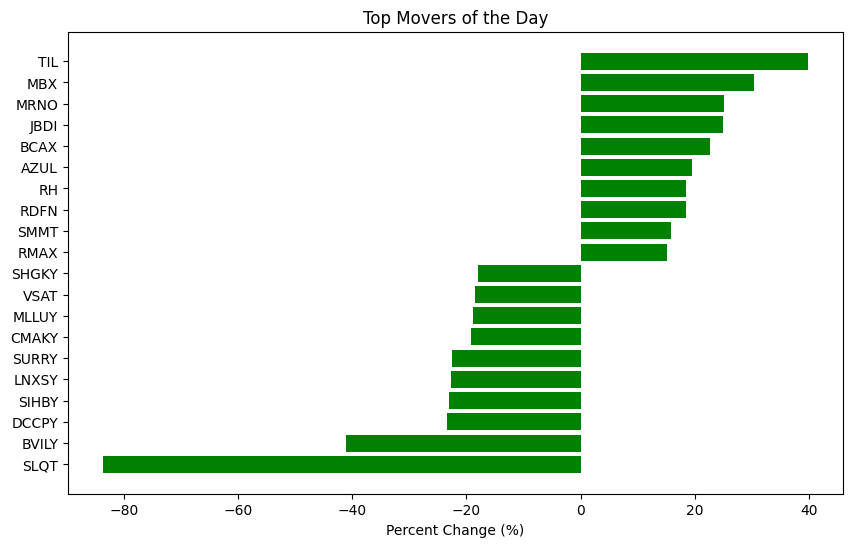

In [6]:
import matplotlib.pyplot as plt 
# print(movers_df.info())
# print(movers_df.head())

if 'bid_price' in movers_df.columns and 'last_non_reg_trade_price' in movers_df.columns:
    movers_df['current_price'] = movers_df['last_trade_price']
    movers_df['previous_close_price'] = movers_df['adjusted_previous_close']
else:
    print("Columns 'bid_price' and/or 'last_non_reg_trade_price' not found.")

movers_df.dropna(subset=['current_price', 'previous_close_price'], inplace=True)

movers_df['percent_change'] = ((movers_df['current_price'].astype(float) - movers_df['previous_close_price'].astype(float)) / movers_df['current_price'].astype(float)) * 100

top_movers = movers_df[['symbol', 'percent_change']].head(20).sort_values('percent_change')

plt.figure(figsize=(10, 6))
plt.barh(top_movers['symbol'], top_movers['percent_change'], color='green')
plt.xlabel('Percent Change (%)')
plt.title('Top Movers of the Day')
plt.show()

## Combined APIs

In [15]:
import robin_stocks.robinhood as r
import getpass
import yahoo_fin.stock_info as si
from yahoo_fin import news 
import time
import pandas as pd

movers = r.get_top_movers()  
movers_df = pd.DataFrame(movers)

data_list = []

for idx, mover in movers_df.iterrows():
    # print(mover['symbol'].lower())
    # print(type(mover['symbol']))
    # print(len(mover['symbol']))
    # time.sleep(0.5) . #Be careful a delay may need to be added
    articles = news.get_yf_rss(mover['symbol'].lower())
    percent_change = (((float(mover['last_trade_price']) - float(mover['adjusted_previous_close'])) / float(mover['last_trade_price'])) * 100)
    row = {
        'symbol': mover['symbol'],
        'open_price': mover['adjusted_previous_close'],
        'current_price': mover['last_trade_price'],
        'percent_change' : percent_change, 
        'article_1': [articles[0]['title'], articles[0]['published'], articles[0]['link']] if len(articles) > 0 else None,
        'article_2': [articles[1]['title'], articles[1]['published'], articles[1]['link']] if len(articles) > 1 else None,
        'article_3': [articles[2]['title'], articles[2]['published'], articles[2]['link']] if len(articles) > 2 else None,
        'article_4': [articles[3]['title'], articles[3]['published'], articles[3]['link']] if len(articles) > 3 else None,
        'article_5': [articles[4]['title'], articles[4]['published'], articles[4]['link']] if len(articles) > 4 else None,

    }
    # print(row)
    data_list.append(row)

data_df = pd.DataFrame(data_list)

In [6]:
# Export DataFrame to JSON
data_df.to_json('data.json', orient='records', indent=2)

print("DataFrame exported to data.json")

DataFrame exported to data.json


In [68]:
import requests
import json

def fetch_gainers_and_save_to_json():
    # Define the API endpoint
    url = "https://financialmodelingprep.com/api/v3/stock_market/gainers?apikey=47aF67g8nwXCiKguRSbHRy3WfKuQFPPq"

    # Send a GET request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response content into JSON
        gainers_data = response.json()
        
        # Save the data into a JSON file
        with open('gainers.json', 'w') as json_file:
            json.dump(gainers_data, json_file, indent=4)
        
        print("Data successfully saved to gainers.json")
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}, Error: {response.text}")

# Fetch gainers and save them to a JSON file
fetch_gainers_and_save_to_json()


Data successfully saved to gainers.json


In [4]:
import json
import pandas as pd
import yahoo_fin.stock_info as si
from yahoo_fin import news
import yfinance as yf

# Define the function to fetch and convert news to DataFrame
def get_news_data_from_json(json_file_path: str):
    # Load the JSON file with the symbols
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    # Initialize lists to store all symbols' news data
    all_titles = []
    all_published_dates = []
    all_links = []
    all_symbols = []
    all_percent_changes = []
    all_current_prices = []
    all_floats = []
    all_avg_volumes = []
    all_current_volumes = []
    
    # Iterate through the data
    for item in data:
        symbol = item['symbol']
        percent_change = item['changesPercentage']
        price = item['price']
        # Fetch the stock data using yfinance
        stock = yf.Ticker(symbol)
        stock_info = stock.info
        
        # Fetch the current price, float, average volume, and current volume
        float_shares = stock_info.get('floatShares')
        average_volume = stock_info.get('averageVolume')
        
        # Fetch the latest trading day's data for the current volume
        stock_data = stock.history(period='1d')
        current_volume = stock_data['Volume'][0] if not stock_data.empty else None

        # Fetch the news using the provided symbol
        news_data = news.get_yf_rss(symbol)
        
        # Process each article in the news list
        for article in news_data:
            # Crop the title if it's too long
            cropped_title = article['title']
            published = article['published'][:25]
            
            # Append data to the respective lists
            all_titles.append(cropped_title)
            all_published_dates.append(published)
            all_links.append(article['link'])
            all_symbols.append(symbol)
            all_percent_changes.append(percent_change)
            all_current_prices.append(price)
            all_floats.append(float_shares)
            all_avg_volumes.append(average_volume)
            all_current_volumes.append(current_volume)
    
    # Create a DataFrame from the lists
    df = pd.DataFrame({
        'Symbol': all_symbols,
        'Percent Change': all_percent_changes,
        'Summary': all_titles,
        'Published': all_published_dates,
        'Link': all_links,
        'Current Price': all_current_prices,
        'Float': all_floats,
        'Average Volume': all_avg_volumes,
        'Current Volume': all_current_volumes
    })
    
    return df

# Example usage:
# json_file_path = 'path_to_your_json_file.json'
# news_df = get_news_data_from_json(json_file_path)


Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [5]:
big_data1 = get_news_data_from_json('gainers.json')

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/3377017286.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_volume = stock_data['Volume'][0] if not stock_data.empty else None
/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/3377017286.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_volume = stock_data['Volume'][0] if not stock_data.empty else None
/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/3377017286.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [6]:
big_data1.head()

,Symbol,Percent Change,Summary,Published,Link,Current Price,Float,Average Volume,Current Volume
0,VEEA,220.7547,Crowdkeep and VEEA Announce Strategic Partners...,"Wed, 18 Sep 2024 12:30:00",https://finance.yahoo.com/news/crowdkeep-veea-...,17.0,NaN,16280,5794679
1,VEEA,220.7547,Veea Inc. and Plum Acquisition Corp. I Announc...,"Mon, 16 Sep 2024 12:30:00",https://finance.yahoo.com/news/veea-inc-plum-a...,17.0,NaN,16280,5794679
2,OMEX,201.0617,Odyssey Marine Exploration Reports Win in NAFT...,"Tue, 17 Sep 2024 18:02:00",https://finance.yahoo.com/news/odyssey-marine-...,1.5,15506594.0,614872,312796453
3,OMEX,201.0617,While institutions invested in Odyssey Marine ...,"Sat, 14 Sep 2024 14:35:02",https://finance.yahoo.com/news/while-instituti...,1.5,15506594.0,614872,312796453
4,OMEX,201.0617,Odyssey Marine Exploration Reports Second Quar...,"Fri, 09 Aug 2024 12:30:00",https://finance.yahoo.com/news/odyssey-marine-...,1.5,15506594.0,614872,312796453


In [7]:
from datetime import datetime, timedelta
big_data1['Published'] = pd.to_datetime(big_data1['Published'])
current_date = datetime.now()
two_weeks_ago = current_date - timedelta(weeks=2)
big_data2 = big_data1[big_data1['Published'] >= two_weeks_ago]

In [8]:
big_data3 = big_data2[(big_data2['Current Volume'] >= 5 * big_data2['Average Volume']) &
                 (big_data2['Float'] <= 10000000) &
                 (big_data2['Current Price'] <= 20)]

In [3]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")

/Users/benbaize/anaconda3/envs/stock_dashboard/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/benbaize/anaconda3/envs/stock_dashboard/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
# Create new columns to store the sentiment scores (NEG, NEU, POS)
big_data3['Neg'] = None
big_data3['Neo'] = None
big_data3['Pos'] = None

# Loop through each row in the dataframe and apply the analyzer to the Summary column
for index, row in big_data3.iterrows():
    result = analyzer.predict(row['Summary'])
    # Store the probabilities in the respective columns
    big_data3.at[index, 'Neg'] = result.probas['NEG']
    big_data3.at[index, 'Neo'] = result.probas['NEU']
    big_data3.at[index, 'Pos'] = result.probas['POS']

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/1242695532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data3['Neg'] = None
/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/1242695532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_data3['Neo'] = None
/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_54759/1242695532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind